# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

In [21]:
first = 0
last = 5
number = 100
mu = 0
sigma = 1
x = np.arange(first,last,(last)/(number))
noise = np.random.normal(mu,sigma,number)

In [22]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95])

In [23]:
print(noise)

[ 1.8831507  -1.34775906 -1.270485    0.96939671 -1.17312341  1.94362119
 -0.41361898 -0.74745481  1.92294203  1.48051479  1.86755896  0.90604466
 -0.86122569  1.91006495 -0.26800337  0.8024564   0.94725197 -0.15501009
  0.61407937  0.92220667  0.37642553 -1.09940079  0.29823817  1.3263859
 -0.69456786 -0.14963454 -0.43515355  1.84926373  0.67229476  0.40746184
 -0.76991607  0.53924919 -0.67433266  0.03183056 -0.63584608  0.67643329
  0.57659082 -0.20829876  0.39600671 -1.09306151 -1.49125759  0.4393917
  0.1666735   0.63503144  2.38314477  0.94447949 -0.91282223  1.11701629
 -1.31590741 -0.4615846  -0.06824161  1.71334272 -0.74475482 -0.82643854
 -0.09845252 -0.66347829  1.12663592 -1.07993151 -1.14746865 -0.43782004
 -0.49803245  1.92953205  0.94942081  0.08755124 -1.22543552  0.84436298
 -1.00021535 -1.5447711   1.18802979  0.31694261  0.92085882  0.31872765
  0.85683061 -0.65102559 -1.03424284  0.68159452 -0.80340966 -0.68954978
 -0.4555325   0.01747916 -0.35399391 -1.37495129 -0.6

---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

In [24]:
def y(x):
    """真の関数"""
    return 3 - 5 * x + x ** 2

### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [47]:
t = y(x) + noise
print(t)
t.shape

[ 4.8831507   1.40474094  1.239515    3.24189671  0.86687659  3.75612119
  1.17638102  0.62504519  3.08294203  2.43301479  2.61755896  1.45854466
 -0.50122569  2.08256495 -0.27800337  0.6149564   0.58725197 -0.68251009
 -0.07592063  0.07470667 -0.62357447 -2.24690079 -0.99176183 -0.1011141
 -2.25456786 -1.83713454 -2.24515355 -0.07823627 -1.36770524 -1.74003816
 -3.01991607 -1.80825081 -3.11433266 -2.49566944 -3.24584608 -2.01106671
 -2.18340918 -3.03579876 -2.49399329 -4.04056151 -4.49125759 -2.6081083
 -2.9233265  -2.49246856 -0.77685523 -2.24302051 -4.12282223 -2.11048371
 -4.55590741 -3.7090846  -3.31824161 -1.53415728 -3.98475482 -4.05393854
 -3.30845252 -3.85097829 -2.03336408 -4.20743151 -4.23746865 -3.48532004
 -3.49803245 -1.01796795 -1.94057919 -2.73994876 -3.98543552 -1.84313702
 -3.61021535 -4.0722711  -1.25197021 -2.03055739 -1.32914118 -1.82877235
 -1.18316939 -2.57852559 -2.84424284 -1.00590548 -2.36340966 -2.11704978
 -1.7455325  -1.13002084 -1.35399391 -2.22245129 -1.3

(100,)

matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

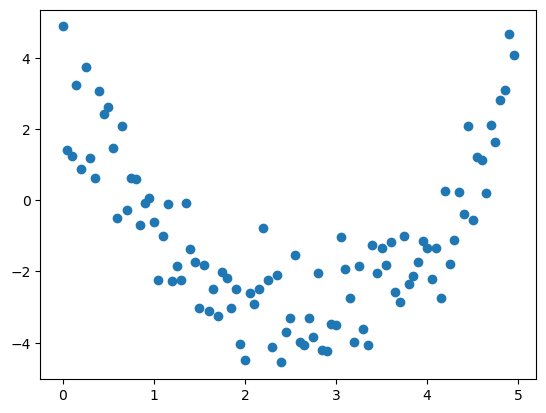

In [26]:
plt.scatter(x, t)

---

### 問3. `ndarray`の結合

以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray`
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\end{array}
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

In [38]:
x_1 = np.array([list(map(int,input().split()))])
x_0 = np.array(np.power(x_1, 0))
x_2 = np.array(np.power(x_1, 2))
X = np.array([x_0,x_1,x_2]).T
print(X)
X = X.reshape(1,3,3)
print(X)
X.shape

[[[1 1 1]]

 [[1 2 4]]

 [[1 3 9]]]
[[[1 1 1]
  [1 2 4]
  [1 3 9]]]


(1, 3, 3)

---

### 問4. 線形代数

観測値 `x, t` をもとに真の関数 `y` を2次関数で回帰しなさい．

任意の2次関数は $y(x) = w_0 + w_1 x + w_2 x^2$ と表すことができます．  
なので，パラメータのベクトル $\mathbf{w} = (w_0, w_1, w_2)$ を求めれば良いことになります．

これは以下の正規方程式から求めることができます．

$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{t} $

この式の導出はdev_data勉強会で学びます．

行列の積が多い場合は`np.dot`を使わない方が簡潔に書けます．

In [46]:
X_tenchi = X.T.reshape(1,3,3)
np.dot(X_tenchi,X)

array([[[[ 3,  6, 14]],

        [[ 6, 14, 36]],

        [[14, 36, 98]]]])

In [56]:
t_use = y(X) + np.random.normal(mu,sigma,(1,3,3))
t_use = t_use.reshape(1,3,3)
w0, w1, w2 = np.dot(np.linalg.inv(X_tenchi@X)),np.dot(X_tenchi@t_use)
pred_y = w0 + w1 * x + w2 * x ** 2
print(pred_y)

TypeError: dot() missing 1 required positional argument: 'b'

In [16]:
import numpy as np

# Original x
x = np.array(np.arange(0, 5, 5/100))
x = x.reshape(-1, 1)

# Add x^2 as a feature
x = np.concatenate([np.ones_like(x), x, x**2], axis=1)  # Add a column of ones for the intercept

w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, t)) 
w0, w1, w2 = w[0], w[1], w[2]

pred_y = w0 + w1 * x[:,-1] + w2 * x[:,-2] ** 2
print(pred_y)


[ 3.65314901e+00  3.64216793e+00  3.60922472e+00  3.55431936e+00
  3.47745186e+00  3.37862222e+00  3.25783043e+00  3.11507650e+00
  2.95036043e+00  2.76368221e+00  2.55504185e+00  2.32443935e+00
  2.07187470e+00  1.79734792e+00  1.50085898e+00  1.18240791e+00
  8.41994692e-01  4.79619331e-01  9.52818270e-02 -3.11017820e-01
 -7.39279610e-01 -1.18950354e+00 -1.66168962e+00 -2.15583784e+00
 -2.67194820e+00 -3.21002071e+00 -3.77005535e+00 -4.35205215e+00
 -4.95601108e+00 -5.58193216e+00 -6.22981538e+00 -6.89966074e+00
 -7.59146825e+00 -8.30523790e+00 -9.04096969e+00 -9.79866363e+00
 -1.05783197e+01 -1.13799379e+01 -1.22035183e+01 -1.30490608e+01
 -1.39165655e+01 -1.48060323e+01 -1.57174612e+01 -1.66508523e+01
 -1.76062055e+01 -1.85835209e+01 -1.95827984e+01 -2.06040380e+01
 -2.16472398e+01 -2.27124038e+01 -2.37995298e+01 -2.49086181e+01
 -2.60396684e+01 -2.71926809e+01 -2.83676556e+01 -2.95645924e+01
 -3.07834913e+01 -3.20243524e+01 -3.32871757e+01 -3.45719610e+01
 -3.58787085e+01 -3.72074

---

### 結果

先ほどのグラフに真の関数(緑)と回帰曲線(赤)を重ねると以下のようになります．

ValueError: x and y must be the same size

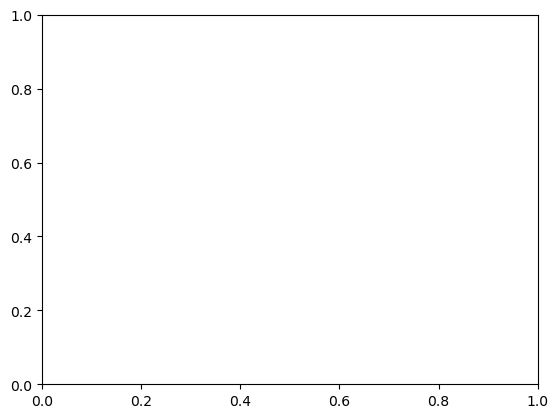

In [17]:
plt.scatter(x, t)
plt.plot(x, pred_y, linewidth=5, color="red", label="pred")
plt.plot(x, y(x), linewidth=5, color="green", label="true")
plt.legend()

今回使った手法は 真の関数 `y` の定義を変更するとその他のコードを全く変更しなくても同様に回帰することができます．

例えば以下のように変更したらその関数を回帰します．

```python
def y(x):
    """真の関数"""
    return 5 * np.sin(np.pi * x / 5)
```
dev_data勉強会で詳しくやりますが，この回帰曲線の表現力は2次までです．
カーブが2つ以上の曲線を回帰したい場合は問3の計画行列の列数を　`x3, x4...`　のように増やせば表現力が上がります．